In [1]:
# Essential Libraries
import random
import time
import json
import signal
import copy
import glob

# Scientific Libraries
import numpy as np
from scipy.stats import norm

# RDKit Libraries
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Graph Libraries
import networkx as nx
import networkx.algorithms.isomorphism as iso

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning Libraries
from sklearn.metrics import confusion_matrix

# Configure Matplotlib to use LaTeX and Times New Roman for fonts
plt.rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"]

from utils import macro_unsupervised as unsup
from utils import plot

# Load Graphs for GED Dataset

In [2]:
GED_GRAPHS_400 = {}
GED_GRAPHS_400_path = "../GED_GRAPHS_400/"
for name in glob.glob(GED_GRAPHS_400_path + "*.gpickle"):
    graph = nx.read_gpickle(name)
    GED_GRAPHS_400[name[len(GED_GRAPHS_400_path) : -8]] = graph

# Load GED Dataset

In [3]:
with open("../GED_Dict_400_400.json", "r") as json_file:
    GED_Dict_400_400 = json.load(json_file)
print(len(GED_Dict_400_400))

160000


In [22]:
random.seed(42)
with open("../graph_0_199_IDs.json", "r") as json_file:
    graph_0_199_IDs = json.load(json_file)

random.shuffle(graph_0_199_IDs)

with open("../graph_200_399_IDs.json", "r") as json_file:
    graph_200_399_IDs = json.load(json_file)

random.shuffle(graph_200_399_IDs)

graph_0_399_IDs = graph_0_199_IDs + graph_200_399_IDs

# Visualize Graphs

{0: 'Glc', 1: 'Glc', 2: 'GlcNAc', 3: 'Glc', 4: 'Glc', 5: 'Kdo'}


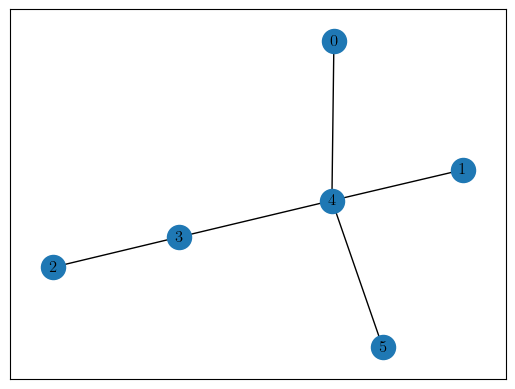

In [23]:
plot.graph(GED_GRAPHS_400[graph_0_399_IDs[0]])

{0: 'Man', 1: 'D-RhaOMe', 2: 'D-Rha', 3: 'Man', 4: 'Man'}


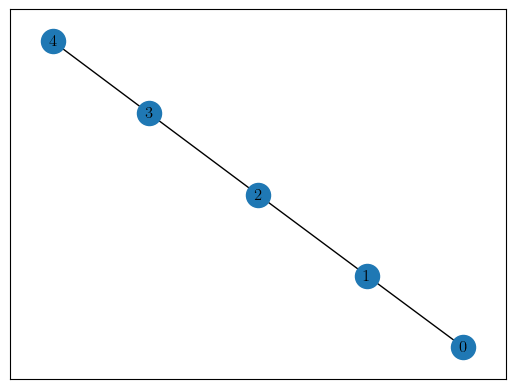

In [24]:
plot.graph(GED_GRAPHS_400[graph_0_399_IDs[104]])

# Graph Edit Distance with A* method implemented by networkx

In [25]:
unsup.edit_distance(
    GED_GRAPHS_400[graph_0_399_IDs[0]], GED_GRAPHS_400[graph_0_399_IDs[104]]
)

6.855357142857143

In [26]:
graph_pair_key = graph_0_399_IDs[0] + "," + graph_0_399_IDs[104]
print(GED_Dict_400_400[graph_pair_key])

6.855357142857143


## Compute GED

In [37]:
# uncomment to calculate the whole graph edit distance for GED_matrix_400_400
# this step will take a very long time.

# GED_matrix_400_400 = np.zeros([400,400])

# for i in range(0, 400):
#    for j in range(0, 400):
#        GED_matrix_400_400[i,j] = unsup.edit_distance(GED_GRAPHS_400[graph_0_399_IDs[i]],
#                                                      GED_GRAPHS_400[graph_0_399_IDs[j]])

## Read the Precomputed GED

In [27]:
GED_matrix_400_400 = np.zeros([400, 400])

for i in range(0, 400):
    for j in range(0, 400):
        graph_pair_key = graph_0_399_IDs[i] + "," + graph_0_399_IDs[j]
        GED_matrix_400_400[i, j] = GED_Dict_400_400[graph_pair_key]

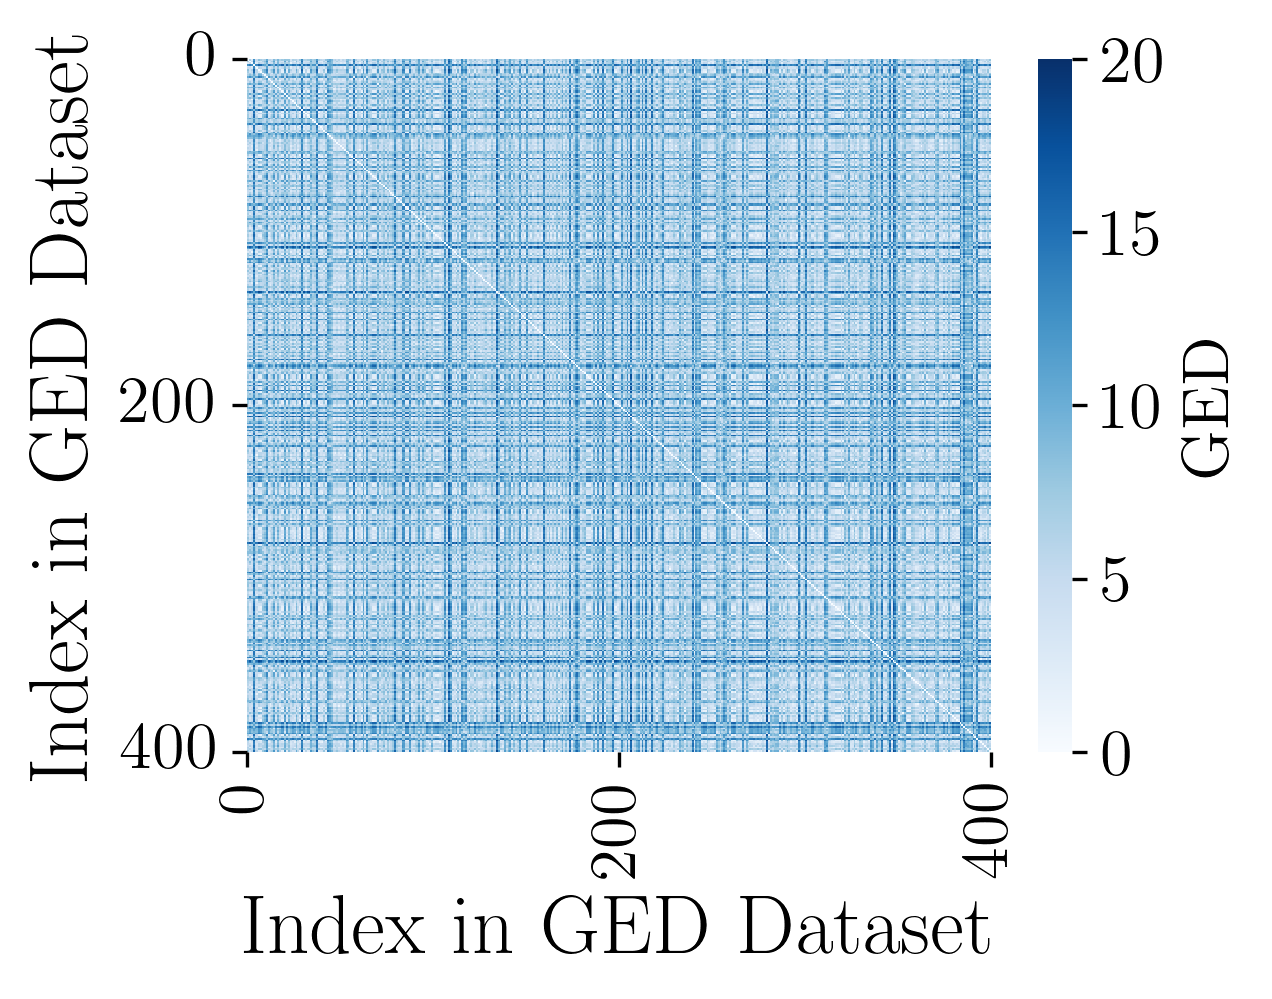

In [28]:
plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    GED_matrix_400_400,
    cmap="Blues",
    vmin=0,
    vmax=20,
    cbar_kws={"label": "GED", "ticks": [0, 5, 10, 15, 20]},
)
# Set custom ticks
plt.xticks([0, 200, 400], [0, 200, 400])
plt.yticks([0, 200, 400], [0, 200, 400])
# plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in GED Dataset", size=20)
plt.ylabel("Index in GED Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("GED", fontsize=16)
plt.show()

# Graph Kernel Method

In [17]:
sim_matrix_from_graph_kernel = unsup.similarity_matrix(
    dict_graphs=GED_GRAPHS_400,
    method="kernel",
    M_input="L2",
    w_input=11.0,
)

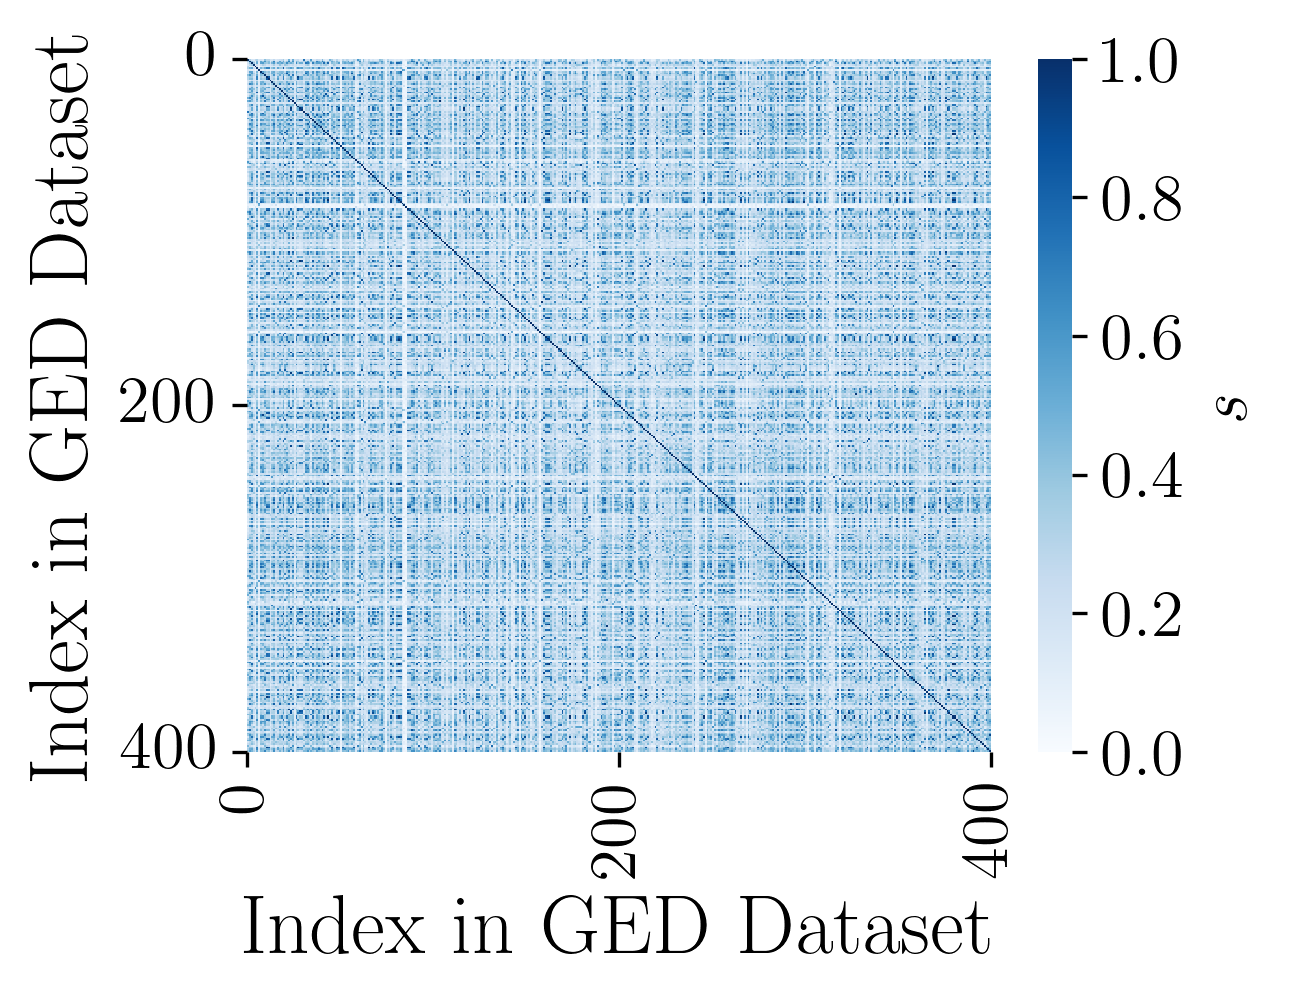

In [ ]:
plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    sim_matrix_from_graph_kernel,
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$s$", "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1]},
)
# Set custom ticks
plt.xticks([0, 200, 400], [0, 200, 400])
plt.yticks([0, 200, 400], [0, 200, 400])
# plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in GED Dataset", size=20)
plt.ylabel("Index in GED Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$s$", fontsize=16)
plt.show()